In [ ]:
#Import required libraries
import pptx

from pptx.util import Cm, Pt, Inches
from pptx.enum.shapes import MSO_SHAPE
from pptx.enum.chart import XL_CHART_TYPE
from pptx.enum.chart import XL_TICK_MARK
from pptx.enum.chart import XL_LABEL_POSITION
from pptx.enum.chart import XL_LEGEND_POSITION
from pptx.chart.data import CategoryChartData
from pptx.chart.data import ChartData
from pptx.chart.data import XyChartData
from pptx.dml.color import RGBColor

import pandas as pd
import matplotlib.pyplot as plt
import win32com.client
import os


In [ ]:
#1 Slide 1 - Creating the title slide

#1 Create the main Presentation object
prs = pptx.Presentation()

#2 Choose the slide layout. 0th, since it is the title.
title_slide_layout = prs.slide_layouts[0]

#3 Add a slide object to the prs object slides with the specified layout as an argument using add_slide
slide = prs.slides.add_slide(title_slide_layout)

#4 Add a title, tied to the title variable
title = slide.shapes.title
title.text = "Here is the title"

#5 Put in the subtitle
subtitle = slide.placeholders[1]
subtitle.text = "Made by: joe El khoury \n xxx xxxx"


#6 Path of image to insert
img_path = "./image_example.jpg"

#7 Insert image1
left = top = Cm(0)
pic = slide.shapes.add_picture(img_path, left, top)

#8 Insert image 2
left = Cm(15)
top = Cm(2)
height = Cm(5)
pic = slide.shapes.add_picture(img_path, left, top, height=height)


#6 Save the file
prs.save("./auto_made_pptx.pptx")


In [ ]:
#2 Slide 2 - Insert a sentence using placeholders

#1 Choose a slide layout and add a slide
normal_slide_layout = prs.slide_layouts[1]
slide = prs.slides.add_slide(normal_slide_layout)

#2-1 enter a title, where the 0th of the placeholder is the title
second_page_title = slide.shapes.placeholders[0]
second_page_title.text_frame.text="slide title"

#2-2 Enter title. Access the text attribute.
#second_page_title = slide.shapes.title
#second_page_title.text = "slide title"

#3 Enter the text for the slide; the first placeholder is the text input area
second_page_body = slide.shapes.placeholders[1]
second_page_body.text_frame.text="text input 1"

#4 Enter text for slide. add_paragraph can set lebel to make it easier to read
tf = second_page_body.text_frame

p=tf.add_paragraph()
p.text="text input 1-2"
p.level = 1

p=tf.add_paragraph()
p.text="text input 2"
p.level = 2

p=tf.add_paragraph()
p.text="text input 3"
p.level = 3

p=tf.add_paragraph()
p.text="text input 4"
p.level = 4

p=tf.add_paragraph()
p.text="text input 5"
p.level = 1

p=tf.add_paragraph()
p.text="text input 6"
p.level = 2

#5 Save the file
prs.save("./auto_made_pptx.pptx")


In [ ]:
#3 Slide 3 - Insert text using textbox

#1 Choose a slide layout and add a slide
blank_slide_layout = prs.slide_layouts[6]
slide = prs.slides.add_slide(blank_slide_layout)

#2 Set textbox size and insert
left = top = Cm(2)
width = Cm(20)
height = Cm(10)
txBox = slide.shapes.add_textbox(left, top, width, height)

#3 Insert text in textbox1
tf = txBox.text_frame
tf.text = "Insert text in textbox\n line breaks are also possible"

#4 Insert text in text box2
p = tf.add_paragraph()
p.text = "Insert sentence in text box (bold)"
p.font.bold = True

#5 Insert text in text box3
p = tf.add_paragraph()
p.text = "Insert sentence in text box\n (font size large)"
p.font.size = Pt(40)

#6 Save the file
prs.save("./auto_made_pptx.pptx")


In [ ]:
#4 Slide 4 - Inserting an image

#1 Choose a slide layout and add a slide
blank_slide_layout = prs.slide_layouts[6]
slide = prs.slides.add_slide(blank_slide_layout)

#2 Path of image to insert
img_path = "./image_example.jpg"

#3 Insert image1
left = top = Cm(0)
pic = slide.shapes.add_picture(img_path, left, top)

#4 Insert image 2
left = Cm(15)
top = Cm(2)
height = Cm(5)
pic = slide.shapes.add_picture(img_path, left, top, height=height)

#5 Save the file
prs.save("./auto_made_pptx.pptx")


In [ ]:
#5 Slide 5 - Inserting an AutoShape

#1 Choose a slide layout and add a slide
blank_slide_layout = prs.slide_layouts[6]
slide = prs.slides.add_slide(blank_slide_layout)

#2 Set the AutoShape to insert
left = Cm(2)
top = Cm(5)
width = Cm(5)
height = Cm(2)

#3 Insert an AutoShape
shape = slide.shapes.add_shape(MSO_SHAPE.PENTAGON, left, top, width, height)
shape.text = "Step 1"

#4 Sequential insertion of AutoShapes
for n in range(2, 4):
    left = left + width
    shape = slide.shapes.add_shape(MSO_SHAPE.CHEVRON, left, top, width, height)
    shape.text= "Step %d" %n

#5 Save the file    
prs.save("./auto_made_pptx.pptx")


In [ ]:
#6 Slide 6 - Inserting a TABLE

#1 Choose a slide layout and add a slide
title_only_slide_layout = prs.slide_layouts[6]
slide = prs.slides.add_slide(title_only_slide_layout)


#2 Configure the table and set the size
rows = cols = 3
left = top = Cm(8)
width = Cm(8)
height = Cm(8)

#3 Create and size the table
table = slide.shapes.add_table(rows, cols, left, top, width, height).table
table.columns[0].width = Cm(2)
table.columns[1].width = Cm(1.5)

#4 Setting values in a table
table.cell(0,0).text = "Cell1"
table.cell(0,1).text = "Cell2"

table.cell(1,0).text = "200"
table.cell(1,1).text = "100"

#5 Save the file
prs.save("./auto_made_pptx.pptx")


In [ ]:
#7 Slide 7 - Inserting a CHART

#1 Choose a slide layout and add a slide
title_only_slide_layout = prs.slide_layouts[5]
slide = prs.slides.add_slide(title_only_slide_layout)
slide.shapes.title.text = "Insert chart (figure)"

#2 Generate data to be drawn on a chart
chart_data = CategoryChartData()
chart_data.categories = ["east", "west", "midwest"]
chart_data.add_series("Series 1", (19.2, 21.4, 16.7))

#3 Chart setup and chart generation
x, y, cx, cy = Cm(5), Cm(5), Cm(15), Cm(13.5)
slide.shapes.add_chart(XL_CHART_TYPE.COLUMN_CLUSTERED, x, y, cx, cy, chart_data)

#4 Save the file
prs.save("./auto_made_pptx.pptx")


In [ ]:
#7 Slide 7 - Inserting a CHART

#1 Choose a slide layout and add a slide
title_only_slide_layout = prs.slide_layouts[5]
slide = prs.slides.add_slide(title_only_slide_layout)
slide.shapes.title.text = "Insert chart (figure)"

#2 Generate data to be drawn on a chart
chart_data = CategoryChartData()
chart_data.categories = ["east", "west", "midwest"]
chart_data.add_series("Series 1", (19.2, 21.4, 16.7))

#3 Chart setup and chart generation
x, y, cx, cy = Cm(5), Cm(5), Cm(15), Cm(13.5)
slide.shapes.add_chart(XL_CHART_TYPE.COLUMN_CLUSTERED, x, y, cx, cy, chart_data)

#4 Save the file
prs.save("./auto_made_pptx.pptx")


In [ ]:
#9 Slide 9 - Insert CHART 3

#1 Choose a slide layout and add a slide
title_only_slide_layout = prs.slide_layouts[5]
slide = prs.slides.add_slide(title_only_slide_layout)
slide.shapes.title.text = "Insert chart (figure) 3"

#2 Generate data to be drawn on the chart
chart_data = XyChartData()

series_1 = chart_data.add_series('Model 1')
series_1.add_data_point(0.7, 2.7)
series_1.add_data_point(1.8, 3.2)
series_1.add_data_point(2.6, 0.8)

series_2 = chart_data.add_series('Model 2')
series_2.add_data_point(1.3, 3.7)
series_2.add_data_point(2.7, 2.3)
series_2.add_data_point(1.6, 1.8)

#3 Creating a chart
chart = slide.shapes.add_chart(
    XL_CHART_TYPE.XY_SCATTER, x, y, cx, cy, chart_data
).chart

#4 Save the file
prs.save("./auto_made_pptx.pptx")


In [ ]:
#10 Slide 10 - Insert CHART 4

#1 Choose a slide layout and add a slide
title_only_slide_layout = prs.slide_layouts[5]
slide = prs.slides.add_slide(title_only_slide_layout)
slide.shapes.title.text = "Insert chart (figure) 4"

#2 Generate data to be drawn on the chart
chart_data = ChartData()
chart_data.categories=["east", "west", "midwest"]
chart_data.add_series("Q1 Sales", (19.2, 21.4, 16.7))
chart_data.add_series("Q2 Sales", (22.3, 28.6, 15.2))
chart_data.add_series("Q3 Sales", (20.4, 26.3, 14.2))

#3 Generate chart
graphic_frame = slide.shapes.add_chart(XL_CHART_TYPE.COLUMN_CLUSTERED, x, y, cx, cy, chart_data)
chart = graphic_frame.chart

#4 Set up axes, etc.
category_axis = chart.category_axis
category_axis.has_major_gridlines = True
category_axis.minor_tick_mark = XL_TICK_MARK.OUTSIDE
category_axis.tick_labels.font.italic = True
category_axis.tick_labels.font.size = Pt(24)

value_axis = chart.value_axis
value_axis.maximum_scale = 50.0
value_axis.minor_tick_mark = XL_TICK_MARK.OUTSIDE
value_axis.has_minor_gridlines = True

tick_labels = value_axis.tick_labels
tick_labels.number_format = '0"%"'
tick_labels.font.bold = True
tick_labels.font.size = Pt(14)

#5 Save the file
prs.save("./auto_made_pptx.pptx")


In [ ]:
#11 Slide 11 - Insert CHART 5

#1 Choose a slide layout and add a slide
title_only_slide_layout = prs.slide_layouts[5]
slide = prs.slides.add_slide(title_only_slide_layout)
slide.shapes.title.text = "Insert chart (figure) 5"

#2 Generate data to be drawn on the chart
chart_data = ChartData()
chart_data.categories=["east", "west", "midwest"]
chart_data.add_series("Q1 Sales", (19.2, 21.4, 16.7))
chart_data.add_series("Q2 Sales", (22.3, 28.6, 15.2))
chart_data.add_series("Q3 Sales", (20.4, 26.3, 14.2))

#3 Generate chart
graphic_frame = slide.shapes.add_chart(XL_CHART_TYPE.COLUMN_CLUSTERED, x, y, cx, cy, chart_data)
chart = graphic_frame.chart

#4 Set labels, etc.
plot = chart.plots[0]
plot.has_data_labels = True
data_labels = plot.data_labels

data_labels.font.size = Pt(13)
data_labels.font.color.rgb = RGBColor(0x0A, 0x42, 0x80)
data_labels.position = XL_LABEL_POSITION.INSIDE_END

#5 Save the file
prs.save("./auto_made_pptx.pptx")


In [ ]:
#12 Slide 12 - Insert CHART 6

#1 Choose a slide layout and add a slide
title_only_slide_layout = prs.slide_layouts[5]
slide = prs.slides.add_slide(title_only_slide_layout)
slide.shapes.title.text = "Insert chart (figure) 6"

#2 Generate data to be drawn on the chart
chart_data = ChartData()
chart_data.categories=["east", "west", "midwest"]
chart_data.add_series("Q1 Sales", (19.2, 21.4, 16.7))
chart_data.add_series("Q2 Sales", (22.3, 28.6, 15.2))
chart_data.add_series("Q3 Sales", (20.4, 26.3, 14.2))

#3 Generate chart
graphic_frame = slide.shapes.add_chart(XL_CHART_TYPE.COLUMN_CLUSTERED, x, y, cx, cy, chart_data)
chart = graphic_frame.chart

#4 Set the legend
chart.has_legend = True
chart.legend.position = XL_LEGEND_POSITION.RIGHT
chart.legend.include_in_layout = False

#5 Save the file
prs.save("./auto_made_pptx.pptx")


In [ ]:
#13 Slide 13 - Insert CHART 7

#1 Choose a slide layout and add a slide
title_only_slide_layout = prs.slide_layouts[5]
slide = prs.slides.add_slide(title_only_slide_layout)
slide.shapes.title.text = "Insert chart (figure) 7"

#2 Generate data to be drawn on the chart
chart_data = ChartData()
chart_data.categories = ['Q1 Sales', 'Q2 Sales', 'Q3 Sales']
chart_data.add_series('West', (32.2, 28.4, 34.7))
chart_data.add_series('East', (24.3, 30.6, 20.2))
chart_data.add_series('Midwest', (20.4, 18.3, 26.2))

#3 Generating a chart
x, y, cx, cy = Inches(2), Inches(2), Inches(6), Inches(4.5)
chart = slide.shapes.add_chart(
    XL_CHART_TYPE.LINE, x, y, cx, cy, chart_data
).chart

chart.has_legend = True
chart.legend.include_in_layout = False
chart.series[0].smooth = True

#4 Save the file
prs.save("./auto_made_pptx.pptx")


# Create Graphs from data and convert to pdf

In [ ]:
#Prepare slide 14 - data generation

test_df = pd.DataFrame({'week_1': [120, 132, 140],
                    'week_2': [130, 131, 130],
                    'week_3': [140, 130, 128]},
                   index=['goods1', 'goods2', 'goods3'])
test_df.to_csv("test_df.csv")


In [ ]:
#14 Slide 14 - Inserting a CHART 8 (loading data)

#1 Reading in data
graph_df = pd.read_csv("test_df.csv", index_col=0)

#2 Choose slide layout and add slides
title_only_slide_layout = prs.slide_layouts[5]
slide = prs.slides.add_slide(title_only_slide_layout)
slide.shapes.title.text = "Insert chart (figure) 8"

#3 Generate data to be drawn on a chart
chart_data = ChartData()
chart_data.categories = ['week_1', 'week_2', 'week_3']
chart_data.add_series('goods1 Sales', (graph_df.loc["goods1", "week_1"], graph_df.loc["goods1", "week_2"], graph_df.loc["goods1", "week_3"]))
chart_data.add_series('goods2 Sales', (graph_df.loc["goods2", "week_1"], graph_df.loc["goods2", "week_2"], graph_df.loc["goods2", "week_3"]))
chart_data.add_series('goods3 Sales', (graph_df.loc["goods3", "week_1"], graph_df.loc["goods3", "week_2"], graph_df.loc["goods3", "week_3"]))

#4 Generate chart
x, y, cx, cy = Inches(2), Inches(2), Inches(6), Inches(4.5)
chart = slide.shapes.add_chart(XL_CHART_TYPE.LINE, x, y, cx, cy, chart_data).chart

chart.has_legend = True
chart.legend.include_in_layout = False
chart.series[0].smooth = True

#5 Save the file
prs.save("./auto_made_pptx.pptx")


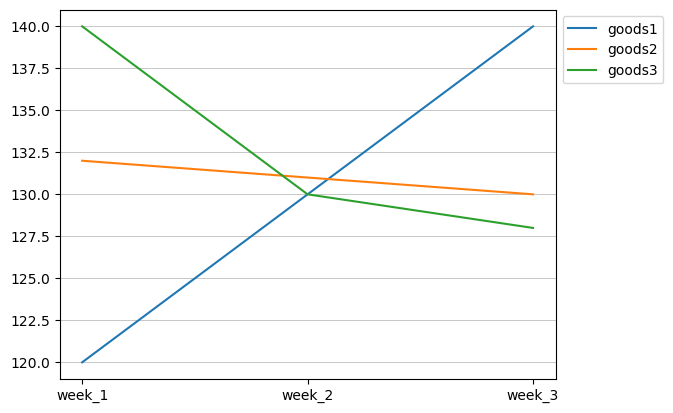

In [ ]:
#Prepare slide 15 - Generating graph images with matplotlib

fig = plt.figure(facecolor="white")
ax = fig.add_subplot(111)
ax.plot(graph_df.T)

labels = list(graph_df.index)
ax.legend(labels, loc='upper left', bbox_to_anchor=(1, 1)) 
ax.grid(axis="y", lw=0.5)

fig.savefig("test_img.png",bbox_inches="tight")


In [ ]:
#15 slide - insert chart 9 (pasting data in matplotlib)

#1 Choose a slide layout and add a slide
blank_slide_layout = prs.slide_layouts[5]
slide = prs.slides.add_slide(blank_slide_layout)
slide.shapes.title.text = "Insert chart (figure) 9"

#2 Inserting an image
img_path = "./test_img.png"
left = top = Cm(6)
pic = slide.shapes.add_picture(img_path, left, top)

#3 Save the file
prs.save("./auto_made_pptx.pptx")


In [ ]:

#1 Prepare to open a Powerpoint application in win32com
application = win32com.client.Dispatch('Powerpoint.Application')
 
#2 Specify the file path by converting it from a relative path to an absolute path. win32com requires the use of absolute paths)
pptx = os.path.abspath('./auto_made_pptx.pptx')
pdf = os.path.abspath('./to_pdf_from_auto_made.pdf')
 
#3 conversion settings
read_only = True # Read only
title = False # Set the title
window = False # Show window
 
#4 Open Powerpoint file and save as PDF
presentation = application.Presentations.Open(pptx, read_only, title, window)
presentation.SaveAs(pdf, 32) #32 indicates filetype
 
#5 Exit process
presentation.close()
application.quit()
presentation = None
application = None
